In [1]:
import pandas as pd
import numpy as np
import re 
#import geopandas as gpd
import pandas as pd
import json
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme(style="whitegrid")
import warnings

warnings.filterwarnings("ignore")

In [2]:
filepath= 'data/demographics/budgets.csv'
budgets_df = pd.read_csv(filepath)

def convert_name(name):
    nm_list = name.split(':')[::-1]
    return ', '.join(nm_list).strip()
    
budgets_df['city_merge_name'] = budgets_df['city_name'].apply(convert_name)
budgets_df['state'] = budgets_df['city_name'].apply(lambda name:name.split(":")[0])
budgets_df[budgets_df.year==2017].head()

,year,city_name,id_city,city_population,cpi,rev_total_city,rev_general_city,intergovt_rev_city,igr_federal_city,igr_state_city,...,cash_other_other,county_name,id_county,county_population,relationship_city_school,enrollment,districts_in_city,consolidated_govt,city_merge_name,state
40,2017,AK: Anchorage,22002001.0,297216,1.0,5694.71,4819.11,2087.49,130.60,1956.89,...,2011.64,NaN,NaN,NaN,4.0,NaN,NaN,1.0,"Anchorage, AK",AK
81,2017,AK: Fairbanks,22006001.0,32015,1.0,1875.06,1875.06,654.10,4.09,650.01,...,6009.89,Fairbanks North Star,21006002.0,100683.0,5.0,NaN,NaN,0.0,"Fairbanks, AK",AK
122,2017,AL: Birmingham,12037003.0,211436,1.0,3655.60,2424.82,213.32,45.73,167.59,...,2879.90,Jefferson,11037037.0,660326.0,1.0,24693.0,1.0,0.0,"Birmingham, AL",AL
163,2017,AL: Mobile,12049004.0,191885,1.0,2408.76,2083.78,90.65,43.90,46.75,...,1497.00,Mobile,11049049.0,415499.0,2.0,25673.0,1.0,0.0,"Mobile, AL",AL
204,2017,AL: Montgomery,12051001.0,200360,1.0,1889.79,1339.40,141.95,24.14,117.81,...,1797.75,Montgomery,11051051.0,227072.0,2.0,28347.0,1.0,0.0,"Montgomery, AL",AL


In [3]:
fbi_data = pd.read_csv('CleanData/FBI_Crime.csv')
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Fort Lauderdale, FL')].index.values,'city_fbi'] = 'Ft. Lauderdale, FL'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('St, FL')].index.values,'city_fbi'] = 'St. Petersburg, FL'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Fort Smith, AR')].index.values,'city_fbi'] = 'Ft. Smith, AR'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Fort Wayne, IN')].index.values,'city_fbi'] = 'Ft. Wayne, IN'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Gary, IL')].index.values,'city_fbi'] = 'Gary, IN'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Kansas City, MO')].index.values,'city_fbi'] = 'Kansas City, KS'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('St, MO')].index.values,'city_fbi'] = 'St. Louis, MO'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('St, MN')].index.values,'city_fbi'] = 'St. Paul, MN'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('CharlotteMecklenburg, NC')].index.values,'city_fbi'] = 'Charlotte, NC'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Las Vegas Metropolitan Police Department, NV')].index.values,'city_fbi'] = 'Las Vegas, NV'
budgets_df.loc[budgets_df.loc[budgets_df['city_merge_name'].str.contains('Oklahoma, OK')].index.values,'city_merge_name'] = 'Oklahoma City, OK'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Fort Worth, TX')].index.values,'city_fbi'] = 'Ft. Worth, TX'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Frederick, DC')].index.values,'city_fbi'] = 'Frederick, MD'
fbi_data.loc[fbi_data.loc[fbi_data['city_fbi'].str.contains('Wilmington, PA')].index.values,'city_fbi'] = 'Wilmington, DE'


### Cities that are missing from FBI dataset:
- Huntington Beach, CA
- Wilmington, DE
- Hialeah, FL
- Aurora, IL
- Yonkers, NY
- This one is interesting (needs: Kansas City, MO
- Garland, TX
- Chesapeake, VA
- Rutland, VT


packages to look at scikit fuzzy

In [4]:
for i in budgets_df['city_merge_name'].unique():
    if(i not in fbi_data['city_fbi'].unique()):
        print(i)

Mesa, AZ
Average for Cities
Anaheim, CA
Fremont, CA
Huntington Beach, CA
Long Beach, CA
Santa Ana, CA
Aurora, CO
Hialeah, FL
Nampa, ID
Aurora, IL
Frederick, MD
Warren, MI
Kansas City, MO
Median for Cities
Nashua, NH
Yonkers, NY
Warwick, RI
Arlington, TX
Garland, TX
Chesapeake, VA
Rutland, VT


In [28]:
merged_df = budgets_df.merge(fbi_data,left_on=['city_merge_name','year'],right_on = ['city_fbi','year'],how='inner')
merged_df['violent_crime'] = merged_df['violent_crime'].apply(float)
merged_df.to_csv('CleanData/MergedBudgetsFBI.csv',index=False)
merged_df['city_merge_name'].unique()

array(['Anchorage, AK', 'Fairbanks, AK', 'Birmingham, AL', 'Mobile, AL',
       'Montgomery, AL', 'Ft. Smith, AR', 'Little Rock, AR',
       'Phoenix, AZ', 'Tucson, AZ', 'Bakersfield, CA', 'Fresno, CA',
       'Los Angeles, CA', 'Modesto, CA', 'Oakland, CA', 'Riverside, CA',
       'Sacramento, CA', 'San Diego, CA', 'San Francisco, CA',
       'San Jose, CA', 'Stockton, CA', 'Colorado Springs, CO',
       'Denver, CO', 'Bridgeport, CT', 'Hartford, CT', 'New Haven, CT',
       'Washington, DC', 'Dover, DE', 'Wilmington, DE',
       'Ft. Lauderdale, FL', 'Jacksonville, FL', 'Miami, FL',
       'Orlando, FL', 'St. Petersburg, FL', 'Tallahassee, FL',
       'Tampa, FL', 'Atlanta, GA', 'Columbus, GA', 'Cedar Rapids, IA',
       'Des Moines, IA', 'Boise, ID', 'Chicago, IL', 'Ft. Wayne, IN',
       'Gary, IN', 'Indianapolis, IN', 'Kansas City, KS', 'Topeka, KS',
       'Wichita, KS', 'Lexington, KY', 'Louisville, KY',
       'Baton Rouge, LA', 'New Orleans, LA', 'Shreveport, LA',
       'Bost

### Let's Do Some Sanity Checking

In [29]:
for i in budgets_df['city_merge_name'].unique():
    if(i not in merged_df['city_merge_name'].unique()):
        print(i)

Mesa, AZ
Average for Cities
Anaheim, CA
Fremont, CA
Huntington Beach, CA
Long Beach, CA
Santa Ana, CA
Aurora, CO
Hialeah, FL
Nampa, ID
Aurora, IL
Frederick, MD
Warren, MI
Kansas City, MO
Median for Cities
Nashua, NH
Yonkers, NY
Warwick, RI
Arlington, TX
Garland, TX
Chesapeake, VA
Rutland, VT


### Ok cool!

In [30]:
budgets_df.columns

Index(['year', 'city_name', 'id_city', 'city_population', 'cpi',
       'rev_total_city', 'rev_general_city', 'intergovt_rev_city',
       'igr_federal_city', 'igr_state_city',
       ...
       'cash_other_other', 'county_name', 'id_county', 'county_population',
       'relationship_city_school', 'enrollment', 'districts_in_city',
       'consolidated_govt', 'city_merge_name', 'state'],
      dtype='object', length=664)

### Let's Dig into the Data

In [31]:
fbi_cols = ['violent_crime','property_crime']
fisc_cols =['rev_total','police','education_services','education','educ_higher','educ_elem_sec','social_services','public_welfare','welfare_cash','welfare_vendors','welfare_other','correction','parks_recreation','housing_commdevt']
display_cols  = ['city_merge_name','population','city_population','year']
merged_df = merged_df[display_cols+fbi_cols+fisc_cols].drop_duplicates()
merged_df

,city_merge_name,population,city_population,year,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,educ_elem_sec,social_services,public_welfare,welfare_cash,welfare_vendors,welfare_other,correction,parks_recreation,housing_commdevt
0,"Anchorage, AK",260900,259348,2000,584.1,4347.3,5523.35,352.61,2426.51,2386.40,0.0,2386.40,195.60,0.00,0.0,0.0,0.00,0.00,213.45,0.00
1,"Anchorage, AK",263588,260816,2001,663.2,4350.0,4831.29,594.42,2281.82,2251.80,0.0,2251.80,138.03,0.00,0.0,0.0,0.00,0.00,266.67,0.00
2,"Anchorage, AK",267280,264274,2002,643.9,4470.6,4914.64,708.42,2455.38,2426.06,0.0,2426.06,165.42,0.00,0.0,0.0,0.00,0.00,285.35,0.00
3,"Anchorage, AK",282940,268229,2003,678.9,4548.3,4463.29,320.32,2590.59,2561.61,0.0,2561.61,176.95,0.00,0.0,0.0,0.00,0.00,121.36,0.00
4,"Anchorage, AK",286671,270568,2004,806.2,3818.7,5007.39,325.37,2627.83,2599.76,0.0,2599.76,143.11,0.00,0.0,0.0,0.00,0.00,136.75,0.00
5,"Anchorage, AK",291624,274484,2005,753.7,4276.1,4944.86,335.65,2636.72,2609.39,0.0,2609.39,108.67,0.00,0.0,0.0,0.00,0.00,114.36,0.00
6,"Anchorage, AK",294862,276494,2006,932.3,4366.4,5198.61,338.51,2632.71,2602.54,0.0,2602.54,115.17,0.00,0.0,0.0,0.00,0.00,121.03,0.00
7,"Anchorage, AK",303996,280085,2007,830.9,4002.4,5708.19,357.36,2416.47,2388.57,0.0,2388.57,102.82,0.00,0.0,0.0,0.00,0.00,278.45,0.00
8,"Anchorage, AK",301010,278792,2008,922.9,3379.3,5371.80,411.99,2786.04,2751.24,0.0,2751.24,102.27,0.00,0.0,0.0,0.00,0.00,320.45,0.00
9,"Anchorage, AK",305284,281554,2009,853.6,3672.0,5060.77,427.53,2891.44,2852.57,0.0,2852.57,105.32,0.00,0.0,0.0,0.00,0.00,277.30,0.00


In [32]:
total_country_proxy = merged_df.groupby('year').sum().reset_index()
total_country_proxy['year'] = pd.to_datetime(total_country_proxy['year'].apply(str))
total_country_proxy

,year,population,city_population,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,educ_elem_sec,social_services,public_welfare,welfare_cash,welfare_vendors,welfare_other,correction,parks_recreation,housing_commdevt
0,2000-01-01,126655616,46556438,50222.2,417702.2,590812.48,34892.74,174671.53,170200.76,999.67,169201.11,50386.65,15722.70,3808.01,1123.68,10791.02,8728.04,16861.89,25249.22
1,2001-01-01,138930525,49206976,57409.4,474323.2,631191.24,38345.21,193836.22,188650.08,1033.45,187616.61,50216.99,17037.77,3625.22,1260.57,12152.00,9435.33,20045.55,26515.56
2,2002-01-01,139404514,48896572,54896.2,469933.7,608922.62,39124.85,192453.05,186775.98,1112.17,185663.83,54563.61,18238.36,3707.93,1348.35,13182.06,10097.77,20637.11,28278.16
3,2003-01-01,166168748,49837225,52699.7,436839.6,607042.59,38405.85,194265.67,188637.18,1447.50,187189.70,60217.48,21294.60,3732.94,3583.83,13977.85,10112.70,20470.64,28143.57
4,2004-01-01,168572979,50494156,53861.1,452532.2,686547.40,40629.64,203095.36,197353.54,1878.45,195475.07,67135.37,21362.55,3486.74,4200.64,13675.22,10480.40,19466.15,29536.89
5,2005-01-01,172052066,51916680,56114.9,441238.4,702976.59,41439.18,209967.64,203947.90,1786.61,202161.33,65147.07,22141.42,3513.54,3976.72,14651.22,11352.82,20531.96,30614.20
6,2006-01-01,176452829,53040851,55269.4,434595.0,728938.30,42749.71,216164.76,210155.74,1787.52,208368.22,67712.86,22689.33,3560.52,4459.70,14669.13,11906.66,21883.22,30746.76
7,2007-01-01,180636516,53449259,53588.0,414198.8,769671.54,44061.94,218895.46,212575.57,1653.93,210921.70,67149.62,23032.50,3300.21,5011.07,14721.25,13307.41,21780.76,31560.64
8,2008-01-01,175641332,52501023,54264.4,400825.3,720306.24,44024.85,220295.76,214322.00,1840.21,212481.81,67853.59,22965.55,3150.58,4875.56,14939.46,12666.97,22218.14,31121.65
9,2009-01-01,189524151,54721504,52662.1,394646.3,685803.18,48715.42,238438.75,232073.61,1971.85,230101.74,77175.21,23938.05,3342.63,6028.19,14567.22,13690.31,22540.64,34684.42


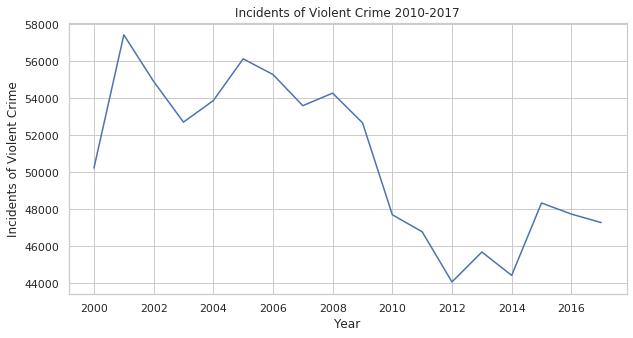

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=total_country_proxy,x='year',y='violent_crime')
_= ax.set_xlabel("Year")
_= ax.set_ylabel("Incidents of Violent Crime") 
_= plt.title("Incidents of Violent Crime 2010-2017")

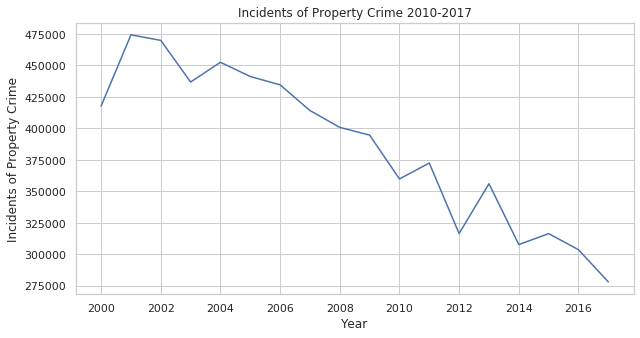

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=total_country_proxy,x='year',y='property_crime')
_= ax.set_xlabel("Year")
_= ax.set_ylabel("Incidents of Property Crime") 
_= plt.title("Incidents of Property Crime 2010-2017")

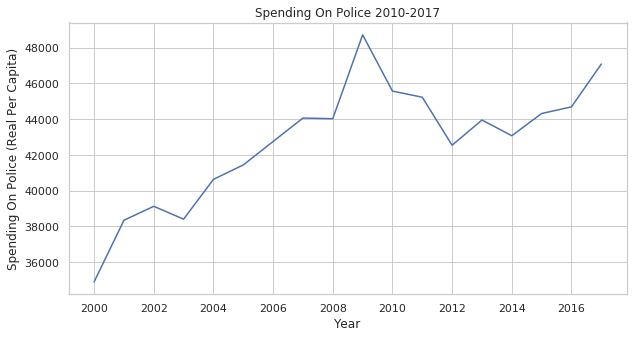

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=total_country_proxy,x='year',y='police')
_= ax.set_xlabel("Year")
_= ax.set_ylabel("Spending On Police (Real Per Capita)") 
_= plt.title("Spending On Police 2010-2017")

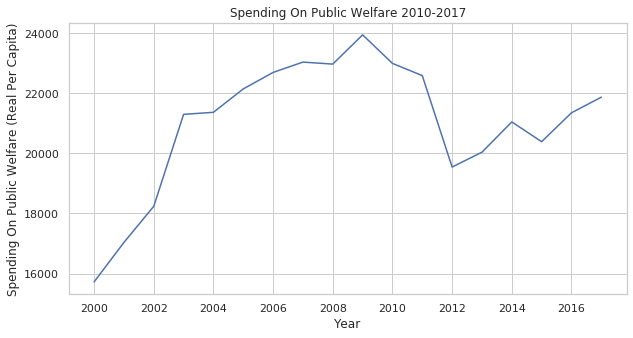

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(data=total_country_proxy,x='year',y='public_welfare')
_= ax.set_xlabel("Year")
_= ax.set_ylabel("Spending On Public Welfare (Real Per Capita)") 
_= plt.title("Spending On Public Welfare 2010-2017")

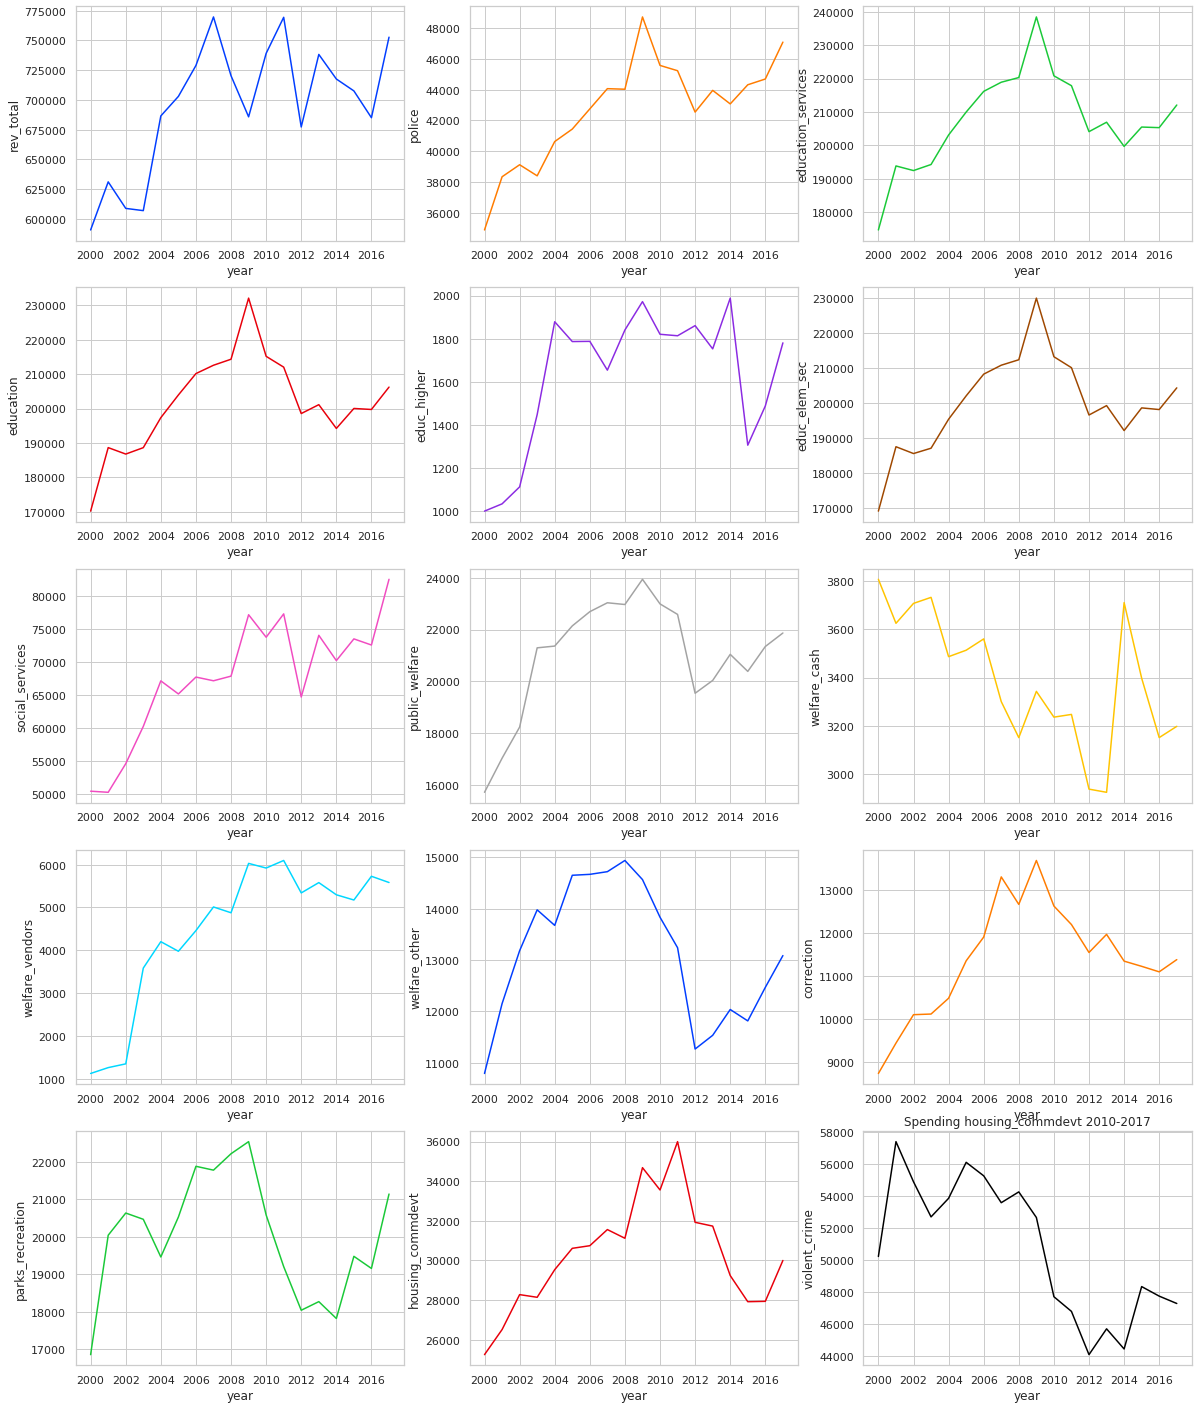

In [37]:
rows = 5
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 25))
pairs = [(i,j) for i in range(rows) for j in range(cols)]
colors = sns.color_palette("bright",15)
index = 0
for i in fisc_cols:
    a_x = pairs[index]
    sns.lineplot(data=total_country_proxy,x='year',y=i,ax=axes[a_x[0], a_x[1]],color=colors[index])
    index+=1
    _= ax.set_xlabel("Year")
    _= ax.set_ylabel("Spending On "+i+" (Real Per Capita)") 
    _= plt.title("Spending " +i+ " 2010-2017")

a_x = pairs[-1]
sns.lineplot(data=total_country_proxy,x='year',y='violent_crime',color='black')

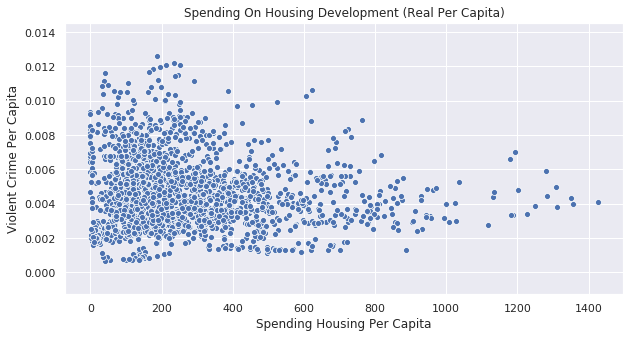

In [10]:
per_capita = merged_df.copy()
per_capita[['violent_crime','property_crime']] = per_capita[['violent_crime','property_crime']]/(10**5)
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=per_capita,x='housing_commdevt',y='violent_crime')
_= ax.set_xlabel("Spending Housing Per Capita")
_= ax.set_ylabel("Violent Crime Per Capita") 
_= plt.title("Spending On Housing Development (Real Per Capita)")

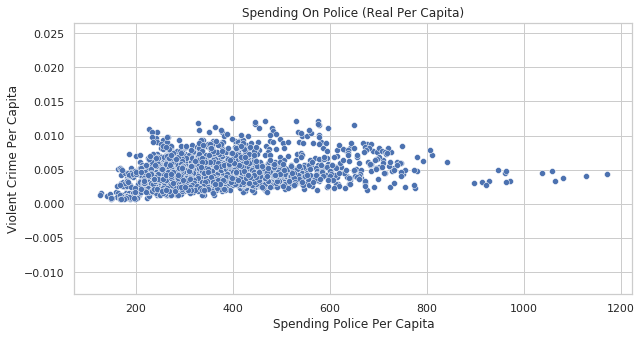

In [17]:
per_capita = merged_df.copy()
per_capita[['violent_crime','property_crime']] = per_capita[['violent_crime','property_crime']]/(10**5)
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(data=per_capita,x='police',y='violent_crime')
_= ax.set_xlabel("Spending Police Per Capita")
_= ax.set_ylabel("Violent Crime Per Capita") 
_= plt.title("Spending On Police (Real Per Capita)")

#### Bokeh Cleaning Functions

In [18]:
def border_states_redacted(name):
    if ('--' in name):
        entry_split= name.split(',')
        city_name=entry_split[0]
        states = entry_split[1].split('--')
        for i in states:
            print(city_name,i)
            
def border_states(name):
    if ('--' in name or '-' in name):
        entry_split= name.split(',')
        if (len(entry_split[0].split('--'))>1):
            print(entry_split[0].split('--'))
        city_name= entry_split[0].split('--')[0]
        state = entry_split[1].split('--')[0]
        return ','.join([city_name,state])
    else: 
        return name

In [19]:
test = merged_df[['violent_crime','property_crime']]/(10**5)
test.describe()

,violent_crime,property_crime
count,1954.000000,1944.000000
mean,0.004673,0.035738
std,0.002024,0.010566
min,0.000654,0.013085
25%,0.003239,0.027884
50%,0.004387,0.034683
75%,0.005777,0.042766
max,0.012627,0.070609


In [20]:
per_capita[per_capita.year==2017].corr()

,population,city_population,year,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,educ_elem_sec,social_services,public_welfare,welfare_cash,welfare_vendors,welfare_other,correction,parks_recreation,housing_commdevt
population,1.000000,0.899317,NaN,-0.027434,-0.273420,0.582645,0.427744,0.227314,0.226264,0.191327,0.219515,0.247470,0.299230,0.294156,0.165917,0.419877,0.267020,0.102008,0.347874
city_population,0.899317,1.000000,NaN,0.042546,-0.185015,0.450037,0.256100,0.211817,0.214304,0.206382,0.206056,0.163245,0.168617,0.223590,0.023217,0.372505,0.243118,0.005047,0.187811
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
violent_crime,-0.027434,0.042546,NaN,1.000000,0.625815,-0.055855,0.088451,-0.177914,-0.171068,-0.160491,-0.166220,-0.035626,-0.119210,-0.004355,-0.079450,-0.194135,-0.021333,-0.048393,-0.274849
property_crime,-0.273420,-0.185015,NaN,0.625815,1.000000,-0.243354,-0.084009,-0.272404,-0.276301,-0.188083,-0.271262,-0.064023,-0.194282,-0.186147,-0.117884,-0.281332,0.005951,-0.025988,-0.339097
rev_total,0.582645,0.450037,NaN,-0.055855,-0.243354,1.000000,0.546759,0.416772,0.407406,0.283942,0.399722,0.727704,0.673630,0.562142,0.530383,0.627032,0.285109,0.140914,0.511640
police,0.427744,0.256100,NaN,0.088451,-0.084009,0.546759,1.000000,0.238426,0.224287,0.179482,0.218347,0.224595,0.397442,0.273646,0.338073,0.340416,0.124287,0.229973,0.411862
education_services,0.227314,0.211817,NaN,-0.177914,-0.272404,0.416772,0.238426,1.000000,0.998773,0.471079,0.996534,0.190948,0.437417,0.231845,0.353312,0.454313,0.104120,-0.145221,0.220689
education,0.226264,0.214304,NaN,-0.171068,-0.276301,0.407406,0.224287,0.998773,1.000000,0.470034,0.997878,0.186509,0.424713,0.223833,0.342142,0.443912,0.097466,-0.155831,0.209184
educ_higher,0.191327,0.206382,NaN,-0.160491,-0.188083,0.283942,0.179482,0.471079,0.470034,1.000000,0.411572,0.232776,0.392059,0.286703,0.332578,0.329386,0.183762,0.023787,0.071339


In [21]:
per_capita = merged_df.copy()
per_capita[['violent_crime','property_crime']] = per_capita[['violent_crime','property_crime']]/(10**5)

In [22]:
per_capita.to_csv('CleanData/Merged_FBI_Budgets_Normalized.csv',index=False)

### Load the Income Data

In [23]:
income_data= pd.read_csv('CleanData/DPI_Clean.csv')
income_data

,city,Year,per_capita_personal_income_dollars,personal_income_thousands_of_dollars,population_persons
0,"Abilene, TX",2000,22930,3675392,160288
1,"Abilene, TX",2001,23618,3753367,158917
2,"Abilene, TX",2002,24558,3905004,159012
3,"Abilene, TX",2003,26050,4137066,158810
4,"Abilene, TX",2004,27005,4325061,160156
5,"Abilene, TX",2005,28319,4552568,160761
6,"Abilene, TX",2006,30057,4850810,161389
7,"Abilene, TX",2007,31598,5119572,162023
8,"Abilene, TX",2008,34662,5632799,162508
9,"Abilene, TX",2009,33046,5415851,163888


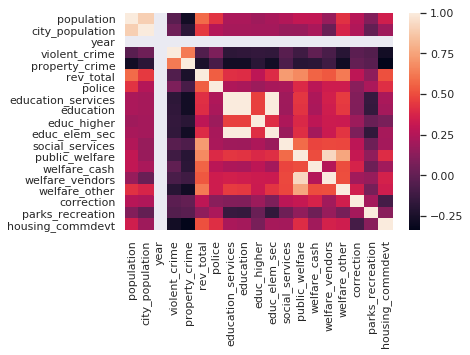

In [11]:
ax = sns.heatmap(per_capita[per_capita.year==2017].corr())

## Lets try to take a look at all the data we have so far

In [3]:
df = pd.read_csv('CleanData/Merged_FBI_Budgets_Normalized.csv')
povertydf = pd.read_csv('CleanData/Demographics.csv')
racedf = pd.read_csv('CleanData/Race.csv')

In [4]:
povertydf.head()

,total_estimate_educational_attainment_population_25_years_and_over,percent_below_poverty_level_estimate_age_65_years_and_over,"percent_below_poverty_level_estimate_worked_full-time,_year-round_in_the_past_12_months",total_estimate_age_18_to_64_years,total_estimate_employment_status_civilian_labor_force_16_years_and_over,total_estimate_population_for_whom_poverty_status_is_determined,percent_below_poverty_level_estimate_age_under_18_years,percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_determined,total_estimate_sex_female,total_estimate_work_experience_population_16_years_and_over,total_estimate_mean_income_deficit_for_unrelated_individuals_(dollars),total_estimate_age_under_18_years,total_estimate_sex_male,total_estimate_age_65_years_and_over,percent_below_poverty_level_estimate_age_18_to_64_years,Year,city_name
0,48468,4.1,8.7,43060,31312,69744,30.6,17.2,35263,55747,5838.0,15270,34481,11414,15.9,2010,"Aberdeen, WA"
1,96942,11.3,7.0,92319,74859,150256,22.0,18.0,78432,117438,5884.0,37109,71824,20828,17.8,2010,"Abilene, TX"
2,65572,8.7,6.0,58351,48754,95657,19.2,14.4,48827,75437,5975.0,22864,46830,14442,14.0,2010,"Adrian, MI"
3,201157,45.6,22.5,187729,99369,303480,61.7,53.8,156077,241690,7320.0,72104,147403,43647,52.6,2010,"Aguadilla, PR"
4,465210,8.2,4.4,434453,368347,687098,22.1,15.5,354028,551307,6588.0,154968,333070,97677,14.7,2010,"Akron, OH"


In [4]:
racedf.head()

,percent_race_one_race_asian,percent_race_one_race_black_or_african_american,percent_race_one_race_native_hawaiian_and_other_pacific_islander,geographic_area_name,percent_race_one_race_white,Year,percent_hispanic_or_latino
0,1.8,1.1,0.1,"Aberdeen, WA",84.4,2010,8.7
1,1.0,7.5,0.0,"Abilene, TX",84.3,2010,21.3
2,0.4,2.1,0.0,"Adrian, MI",93.2,2010,7.6
3,0.0,2.7,0.0,"Aguadilla, PR",87.3,2010,97.3
4,1.9,11.7,0.0,"Akron, OH",83.3,2010,1.5


In [5]:
povertycols = [i for i in povertydf.columns if 'percent' in i]

In [6]:
povertycols.append('city_name')
povertycols.append('Year')

In [7]:
povertydf = povertydf[povertycols]

In [37]:
povertydf.head()

,percent_below_poverty_level_estimate_age_65_years_and_over,"percent_below_poverty_level_estimate_worked_full-time,_year-round_in_the_past_12_months",percent_below_poverty_level_estimate_age_under_18_years,percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_determined,percent_below_poverty_level_estimate_age_18_to_64_years,city_name,Year
0,4.1,8.7,30.6,17.2,15.9,"Aberdeen, WA",2010
1,11.3,7.0,22.0,18.0,17.8,"Abilene, TX",2010
2,8.7,6.0,19.2,14.4,14.0,"Adrian, MI",2010
3,45.6,22.5,61.7,53.8,52.6,"Aguadilla, PR",2010
4,8.2,4.4,22.1,15.5,14.7,"Akron, OH",2010


In [8]:
racelist = list(racedf.columns)
racelist
for idx,val in enumerate(racelist):
    val = val.replace('_race_one_race','')
    racelist[idx] = val

In [42]:
racelist

['percent_asian',
 'percent_black_or_african_american',
 'percent_native_hawaiian_and_other_pacific_islander',
 'geographic_area_name',
 'percent_white',
 'Year',
 'percent_hispanic_or_latino']

In [9]:
racedf.columns = racelist

In [44]:
racedf.head()

,percent_asian,percent_black_or_african_american,percent_native_hawaiian_and_other_pacific_islander,geographic_area_name,percent_white,Year,percent_hispanic_or_latino
0,1.8,1.1,0.1,"Aberdeen, WA",84.4,2010,8.7
1,1.0,7.5,0.0,"Abilene, TX",84.3,2010,21.3
2,0.4,2.1,0.0,"Adrian, MI",93.2,2010,7.6
3,0.0,2.7,0.0,"Aguadilla, PR",87.3,2010,97.3
4,1.9,11.7,0.0,"Akron, OH",83.3,2010,1.5


## Join the race and poverty dfs into one "DEMOgraphic" df

In [10]:
demodf = povertydf.merge(racedf, how = 'inner', left_on= ('city_name', 'Year'), right_on=('geographic_area_name', 'Year'))

In [11]:
demodf = demodf.drop(columns = "geographic_area_name")

In [48]:
demodf.head()

,percent_below_poverty_level_estimate_age_65_years_and_over,"percent_below_poverty_level_estimate_worked_full-time,_year-round_in_the_past_12_months",percent_below_poverty_level_estimate_age_under_18_years,percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_determined,percent_below_poverty_level_estimate_age_18_to_64_years,city_name,Year,percent_asian,percent_black_or_african_american,percent_native_hawaiian_and_other_pacific_islander,percent_white,percent_hispanic_or_latino
0,4.1,8.7,30.6,17.2,15.9,"Aberdeen, WA",2010,1.8,1.1,0.1,84.4,8.7
1,11.3,7.0,22.0,18.0,17.8,"Abilene, TX",2010,1.0,7.5,0.0,84.3,21.3
2,8.7,6.0,19.2,14.4,14.0,"Adrian, MI",2010,0.4,2.1,0.0,93.2,7.6
3,45.6,22.5,61.7,53.8,52.6,"Aguadilla, PR",2010,0.0,2.7,0.0,87.3,97.3
4,8.2,4.4,22.1,15.5,14.7,"Akron, OH",2010,1.9,11.7,0.0,83.3,1.5


In [49]:
df.head()

,city_merge_name,population,city_population,year,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,educ_elem_sec,social_services,public_welfare,welfare_cash,welfare_vendors,welfare_other,correction,parks_recreation,housing_commdevt
0,"Anchorage, AK",260900,259348,2000,0.005841,0.043473,5523.35,352.61,2426.51,2386.40,0.0,2386.40,195.60,0.0,0.0,0.0,0.0,0.0,213.45,0.0
1,"Anchorage, AK",263588,260816,2001,0.006632,0.043500,4831.29,594.42,2281.82,2251.80,0.0,2251.80,138.03,0.0,0.0,0.0,0.0,0.0,266.67,0.0
2,"Anchorage, AK",267280,264274,2002,0.006439,0.044706,4914.64,708.42,2455.38,2426.06,0.0,2426.06,165.42,0.0,0.0,0.0,0.0,0.0,285.35,0.0
3,"Anchorage, AK",282940,268229,2003,0.006789,0.045483,4463.29,320.32,2590.59,2561.61,0.0,2561.61,176.95,0.0,0.0,0.0,0.0,0.0,121.36,0.0
4,"Anchorage, AK",286671,270568,2004,0.008062,0.038187,5007.39,325.37,2627.83,2599.76,0.0,2599.76,143.11,0.0,0.0,0.0,0.0,0.0,136.75,0.0


In [12]:
newmergeddf = df.merge(demodf, how = 'inner', left_on=('city_merge_name', "year"), right_on=('city_name','Year'))

In [52]:
newmergeddf.shape

(862, 32)

In [13]:
len(df.city_merge_name.unique())

130

In [14]:
len(newmergeddf.city_merge_name.unique()) #looks like we lost 14 more cities when combining the demographic data

116

In [68]:
newmergeddf.corr().sort_values(by ="violent_crime", ascending = False)

,population,city_population,year,violent_crime,property_crime,rev_total,police,education_services,education,educ_higher,...,correction,parks_recreation,housing_commdevt,percent_below_poverty_level_estimate_age_65_years_and_over,"percent_below_poverty_level_estimate_worked_full-time,_year-round_in_the_past_12_months",percent_below_poverty_level_estimate_age_under_18_years,percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_determined,percent_below_poverty_level_estimate_age_18_to_64_years,Year,percent_hispanic_or_latino
violent_crime,0.007642,0.051957,0.017151,1.000000,0.505334,0.032637,0.150894,-0.080272,-0.075092,-0.143118,...,-0.000153,-0.061612,-0.163603,0.214932,0.103515,0.340681,0.314571,0.261276,0.017151,0.168342
property_crime,-0.256721,-0.181782,-0.237951,0.505334,1.000000,-0.177731,-0.108778,-0.222735,-0.224239,-0.195116,...,-0.002157,-0.009846,-0.274085,0.100063,0.211110,0.379708,0.393452,0.378381,-0.237951,0.071886
percent_below_poverty_level_estimate_age_under_18_years,-0.047276,0.015843,-0.168709,0.340681,0.379708,-0.119417,-0.035117,-0.110253,-0.098526,-0.064865,...,0.137493,-0.175009,-0.173593,0.568161,0.318440,1.000000,0.950139,0.857889,-0.168709,0.381036
percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_determined,-0.083798,-0.007194,-0.168243,0.314571,0.393452,-0.166251,-0.090354,-0.191906,-0.179698,-0.095468,...,0.145244,-0.167470,-0.216849,0.583445,0.439824,0.950139,1.000000,0.966728,-0.168243,0.404180
percent_below_poverty_level_estimate_age_18_to_64_years,-0.144849,-0.061318,-0.140389,0.261276,0.378381,-0.200734,-0.124306,-0.244051,-0.233646,-0.101700,...,0.116508,-0.154654,-0.221829,0.460097,0.501857,0.857889,0.966728,1.000000,-0.140389,0.308515
percent_below_poverty_level_estimate_age_65_years_and_over,0.237563,0.231516,0.005740,0.214932,0.100063,0.032759,0.101187,-0.056951,-0.045144,-0.032158,...,0.196387,-0.040336,0.001074,1.000000,0.191460,0.568161,0.583445,0.460097,0.005740,0.545075
percent_hispanic_or_latino,0.238176,0.252388,0.010086,0.168342,0.071886,0.062930,0.057622,0.006449,0.020058,-0.094638,...,0.158270,-0.068092,-0.124701,0.545075,0.112912,0.381036,0.404180,0.308515,0.010086,1.000000
police,0.470059,0.275500,0.021087,0.150894,-0.108778,0.600295,1.000000,0.284317,0.272734,0.230652,...,0.245533,0.234884,0.493815,0.101187,-0.176437,-0.035117,-0.090354,-0.124306,0.021087,0.057622
"percent_below_poverty_level_estimate_worked_full-time,_year-round_in_the_past_12_months",-0.169031,-0.105182,0.178018,0.103515,0.211110,-0.276658,-0.176437,-0.303095,-0.296582,-0.157223,...,0.054356,-0.021619,-0.281223,0.191460,1.000000,0.318440,0.439824,0.501857,0.178018,0.112912
city_population,0.895643,1.000000,0.007799,0.051957,-0.181782,0.396517,0.275500,0.154522,0.156614,0.185742,...,0.213696,0.026508,0.145142,0.231516,-0.105182,0.015843,-0.007194,-0.061318,0.007799,0.252388


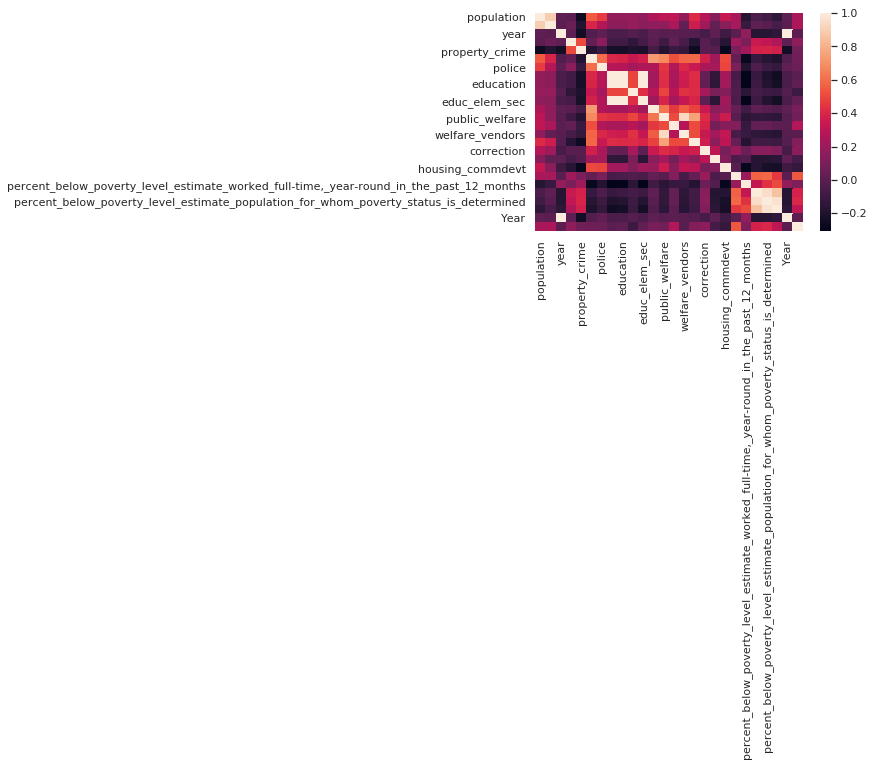

In [66]:
ax = sns.heatmap(newmergeddf.corr())

## SVM Test excercise.
**following along with https://www.youtube.com/watch?v=7sz4WpkUIIs&feature=youtu.be**

In [36]:
newmergeddf["violent_crime"].describe()

count    834.000000
mean       0.004283
std        0.001746
min        0.000702
25%        0.002999
50%        0.003959
75%        0.005318
max        0.011683
Name: violent_crime, dtype: float64

In [39]:
newmergeddf['crime_category'] = newmergeddf["violent_crime"].apply(lambda x: 1 if x > 0.005318 else 0)

In [40]:
newmergeddf['crime_category'].value_counts()

0    653
1    209
Name: crime_category, dtype: int64

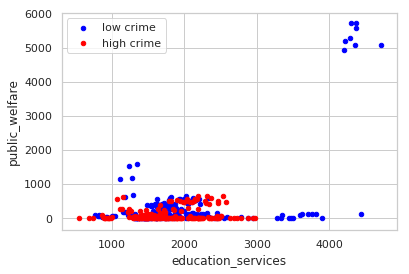

In [41]:
lowcrimedf = newmergeddf[newmergeddf['crime_category']== 0][0:200]
highcrimedf = newmergeddf[newmergeddf['crime_category']==1][0:200]

axes = lowcrimedf.plot(kind = 'scatter', x = 'education_services', y= 'public_welfare', color = 'blue', label = 'low crime')

highcrimedf.plot(kind = 'scatter', x = 'education_services', y = 'public_welfare', color = 'red', label = 'high crime', ax = axes)

In [15]:
newmergeddf.columns

Index(['city_merge_name', 'population', 'city_population', 'year',
       'violent_crime', 'property_crime', 'rev_total', 'police',
       'education_services', 'education', 'educ_higher', 'educ_elem_sec',
       'social_services', 'public_welfare', 'welfare_cash', 'welfare_vendors',
       'welfare_other', 'correction', 'parks_recreation', 'housing_commdevt',
       'percent_below_poverty_level_estimate_age_65_years_and_over',
       'percent_below_poverty_level_estimate_worked_full-time,_year-round_in_the_past_12_months',
       'percent_below_poverty_level_estimate_age_under_18_years',
       'percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_determined',
       'percent_below_poverty_level_estimate_age_18_to_64_years', 'city_name',
       'Year', 'percent_asian', 'percent_black_or_african_american',
       'percent_native_hawaiian_and_other_pacific_islander', 'percent_white',
       'percent_hispanic_or_latino'],
      dtype='object')

In [30]:
svmtestlist = ['population','property_crime', 'rev_total', 'police',
       'education_services','public_welfare','correction', 'parks_recreation', 'housing_commdevt',
       'percent_below_poverty_level_estimate_age_65_years_and_over',
       'percent_below_poverty_level_estimate_worked_full-time,_year-round_in_the_past_12_months',
       'percent_below_poverty_level_estimate_age_under_18_years',
       'percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_determined',
       'percent_below_poverty_level_estimate_age_18_to_64_years',
        'percent_asian', 'percent_black_or_african_american',
       'percent_native_hawaiian_and_other_pacific_islander', 'percent_white',
       'percent_hispanic_or_latino']

In [33]:
svmtestdf=newmergeddf[['population','property_crime', 'rev_total', 'police',
       'education_services','public_welfare','correction', 'parks_recreation', 'housing_commdevt',
       'percent_below_poverty_level_estimate_age_65_years_and_over',
       'percent_below_poverty_level_estimate_worked_full-time,_year-round_in_the_past_12_months',
       'percent_below_poverty_level_estimate_age_under_18_years',
       'percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_determined',
       'percent_below_poverty_level_estimate_age_18_to_64_years',
        'percent_asian', 'percent_black_or_african_american',
       'percent_native_hawaiian_and_other_pacific_islander', 'percent_white',
       'percent_hispanic_or_latino']]

In [34]:
svmtestdf.head()

,population,property_crime,rev_total,police,education_services,public_welfare,correction,parks_recreation,housing_commdevt,percent_below_poverty_level_estimate_age_65_years_and_over,"percent_below_poverty_level_estimate_worked_full-time,_year-round_in_the_past_12_months",percent_below_poverty_level_estimate_age_under_18_years,percent_below_poverty_level_estimate_population_for_whom_poverty_status_is_determined,percent_below_poverty_level_estimate_age_18_to_64_years,percent_asian,percent_black_or_african_american,percent_native_hawaiian_and_other_pacific_islander,percent_white,percent_hispanic_or_latino
0,313181,0.035063,6036.69,433.95,2880.31,0.00,0.0,177.32,0.00,6.2,2.2,12.3,9.4,8.6,6.5,4.9,1.7,71.1,6.7
1,310965,0.033020,5815.54,410.66,2787.14,0.00,0.0,141.81,0.00,4.6,0.9,13.0,8.7,7.5,6.5,4.3,1.6,70.8,6.9
2,313529,0.036182,5378.15,446.75,2429.79,0.00,0.0,75.79,0.00,3.6,1.2,12.3,8.7,7.9,7.4,5.0,1.6,70.3,7.2
3,314553,0.041478,5694.68,454.03,2471.81,0.00,0.0,26.01,0.00,5.2,1.7,7.6,7.1,7.2,6.5,4.8,1.7,69.8,7.6
4,316696,0.039514,5735.87,468.50,2456.47,5.32,0.0,55.31,37.11,4.7,0.7,15.4,9.9,8.5,7.4,4.5,1.7,69.3,7.9
